In [1]:
import os
import keras
import itertools

Using TensorFlow backend.


In [2]:
train,test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
def preprocessing_x(x,flatten = True):
  x = x / 255
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preprocessing_y(y,num_classes=10):
  if y.shape[-1] ==1:
    y = keras.utils.to_categorical(y,num_classes)
  return y
  

In [0]:
x_train,y_train = train
x_test,y_test = test

x_train = preprocessing_x(x_train)
x_test = preprocessing_x(x_test)

y_train = preprocessing_y(y_train)
y_test = preprocessing_y(y_test)


In [0]:
from keras.layers import BatchNormalization

def mlp_(input_shape,output_units=10,num_neurons = [512,256,128]):
  input_layer = keras.layers.Input(input_shape)

  for i , n_units in enumerate(num_neurons):
    if i ==0:
      x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
      x = BatchNormalization()(x)
    else:
      x = keras.layers.Dense(units = n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
      x = BatchNormalization()(x)
  out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
  model = keras.models.Model(inputs=[input_layer],outputs=[out])

  return model

In [0]:
learning_rate = 1e-3
epochs = 50
batch_size = 1024
momentum = 0.95


In [10]:
model = mlp_(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

In [12]:
optimizer = keras.optimizers.SGD(lr = learning_rate,nesterov=True,momentum=momentum)
model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),shuffle=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 11s 216us/step - loss: 2.1831 - acc: 0.2731 - val_loss: 2.0996 - val_acc: 0.2984
Epoch 2/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7333 - acc: 0.3937 - val_loss: 1.8219 - val_acc: 0.3734
Epoch 3/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.6047 - acc: 0.4365 - val_loss: 1.7180 - val_acc: 0.4047
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5317 - acc: 0.4646 - val_loss: 1.6412 - val_acc: 0.4224
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.4780 - acc: 0.4847 - val_loss: 1.5954 - val_acc: 0.4412
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4326 - acc: 0.5001 - val_loss: 1.5736 - val_acc: 0.4497
Epoch 7/50
50000/

In [0]:
train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

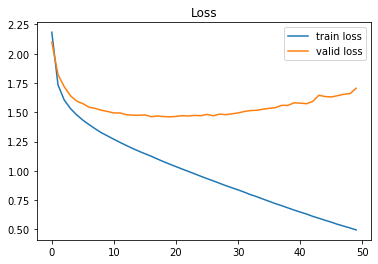

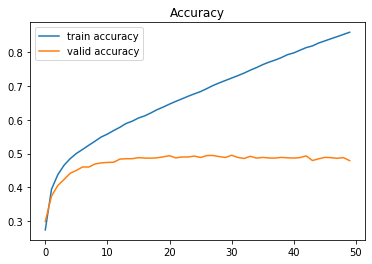

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()